In [1]:
# Checkout www.pygimli.org for more examples
%matplotlib inline


VES inversion for a blocky model
================================

This tutorial shows how an built-in forward operator is used for inversion.
A DC 1D (VES) modelling is used to generate data, noisify and invert them.


We import numpy, matplotlib and the 1D plotting function



In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawModel1D

some definitions before (model, data and error)



In [3]:
## Choose number of layers, resisitivties (synres), thicknesses synthk, current (ab2) and potential electrode spacing
nlay = 3
synres = [100,400,200] # synthetic resistivity
synthk = [3,1.5]  # synthetic thickness (nlay-th layer is infinite)
ab2 = np.logspace(-1, 2, 20)  # AB/2 distance (current electrodes)
mn2 = 0.9*ab2  # MN/2 distance (potential electrodes)

In [4]:
f = pg.core.DC1dModelling(nlay, ab2, ab2/3)

initialize the forward modelling operator



In [5]:
f2 = pg.core.DC1dModelling(nlay, ab2, 0.9*ab2)

the forward operator can be called by f.response(model) or simply f(model)



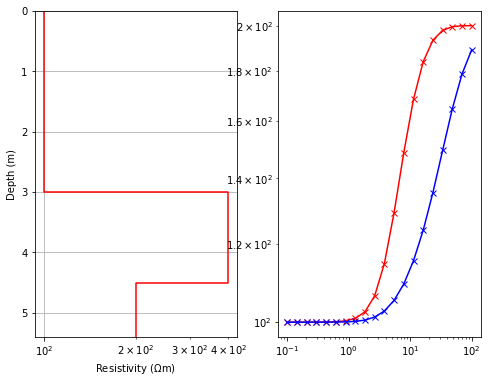

In [6]:
rhoa = f(synthk+synres)
rhoa2 = f2(synthk+synres)
fig, ax = plt.subplots(ncols=2, figsize=(8, 6))  # two-column figure
drawModel1D(ax[0], synthk, synres, plot='semilogx', color='r')
ax[1].loglog(ab2,rhoa, 'rx-', label='data')  # sounding curve
ax[1].loglog(ab2,rhoa2, 'bx-', label='data')  # sounding curve